YEAR:  2007
['Gazole' 'SP95' nan 'GPLc' 'E85']
val MAX Gazole [1999.0, 1964.0, 1900.0]
val MIN Gazole [1.0, 1.0, 1.0]
val MAX SP95 [1999.0, 1800.0, 1690.0]
val MIN SP95 [1.0, 1.0, 1.0]
val MAX GPLc [1312.0, 1280.0, 1199.0]
val MIN GPLc [507.0, 510.0, 510.0]
val MAX E85 [900.0, 899.0, 899.0]
val MIN E85 [750.0, 760.0, 760.0]


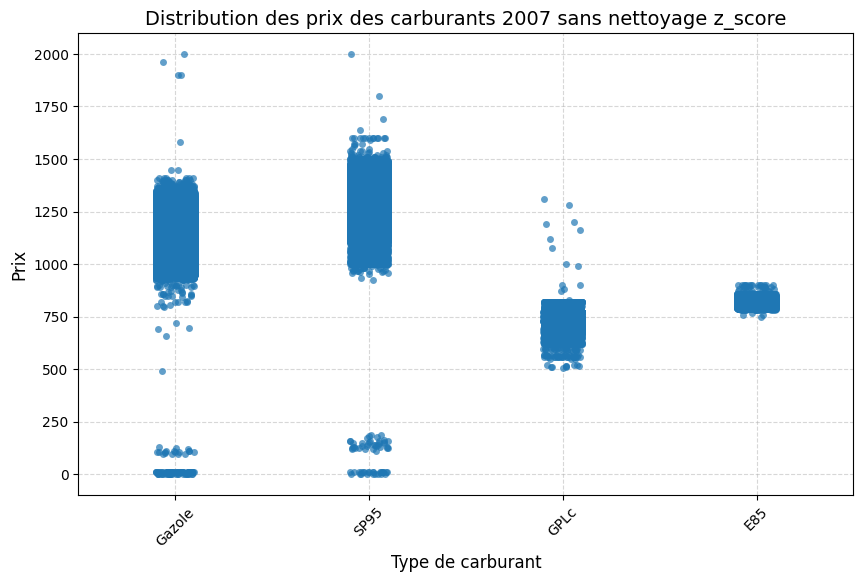

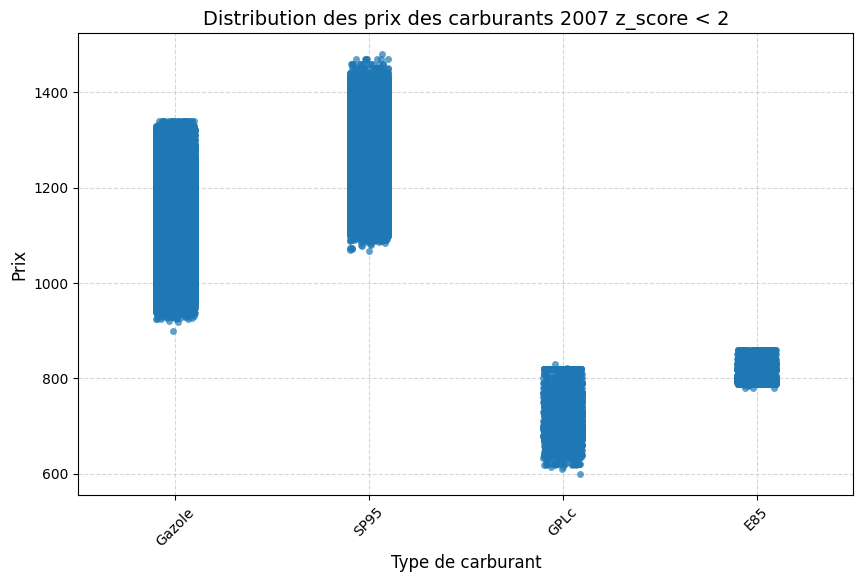

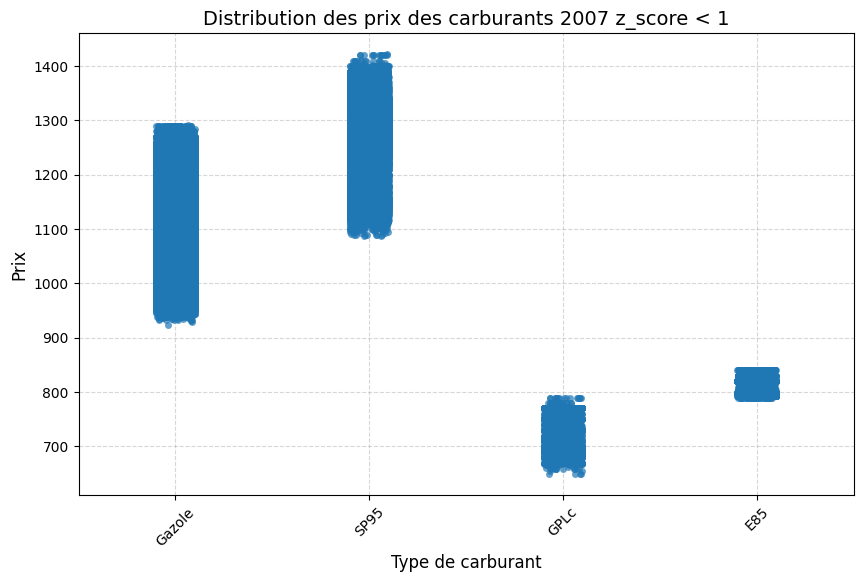

YEAR:  2008
['Gazole' 'SP95' 'GPLc' nan 'E85']
val MAX Gazole [1900.0, 1900.0, 1900.0]
val MIN Gazole [1.0, 11.0, 12.0]
val MAX SP95 [2000.0, 1995.0, 1990.0]
val MIN SP95 [1.0, 1.0, 1.0]
val MAX GPLc [1499.0, 1479.0, 1459.0]
val MIN GPLc [75.0, 500.0, 500.0]
val MAX E85 [1100.0, 1099.0, 1095.0]
val MIN E85 [690.0, 690.0, 700.0]


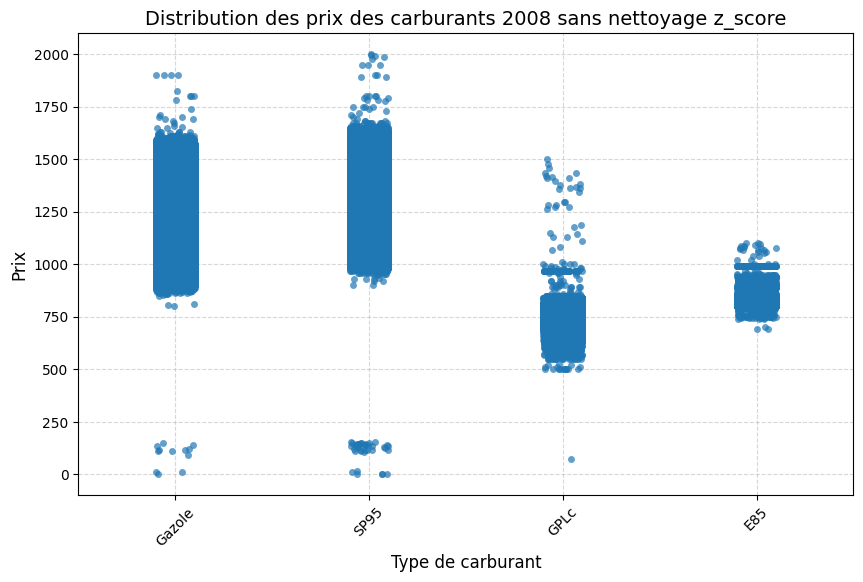

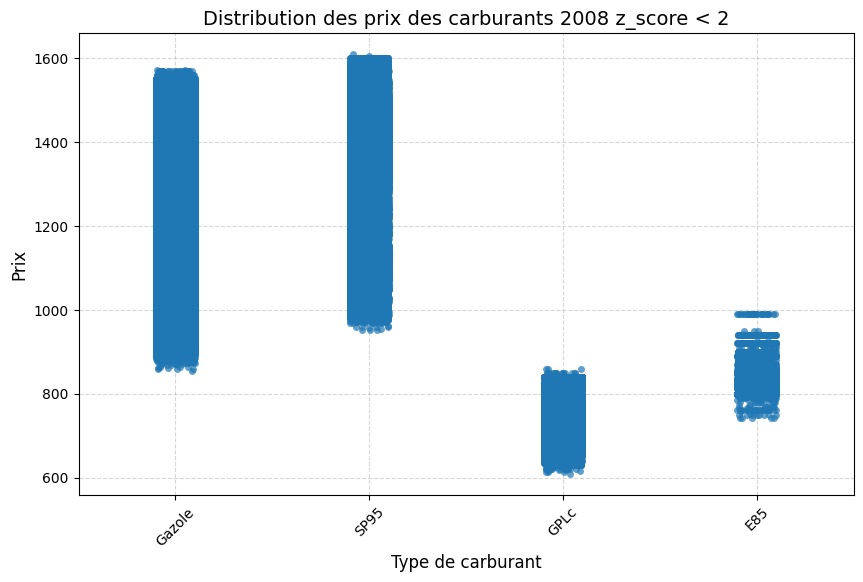

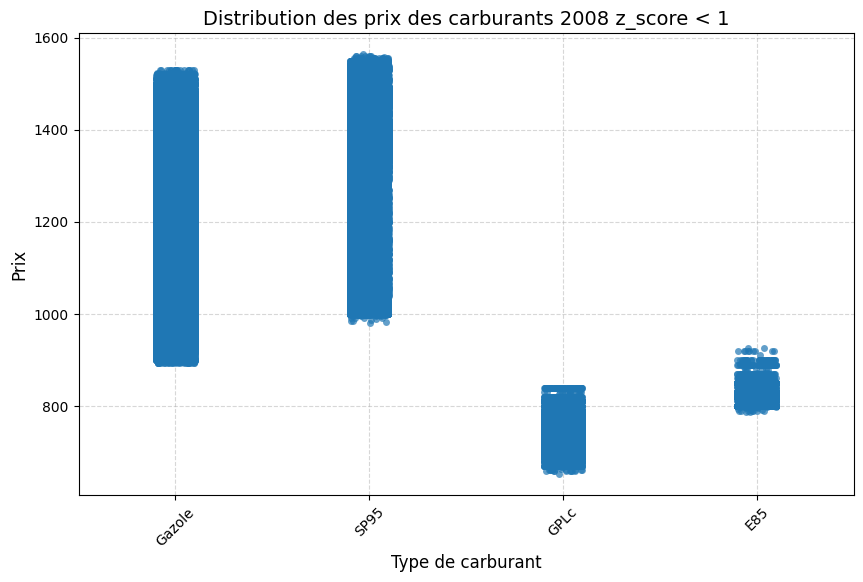

YEAR:  2009
['Gazole' 'SP95' 'E85' 'GPLc' 'E10' nan]
val MAX Gazole [1898.0, 1700.0, 1700.0]
val MIN Gazole [1.0, 1.0, 1.0]
val MAX SP95 [1999.0, 1946.0, 1939.0]
val MIN SP95 [1.0, 1.0, 1.0]
val MAX E85 [1500.0, 1500.0, 1500.0]
val MIN E85 [95.0, 629.0, 666.0]
val MAX GPLc [1348.0, 1279.0, 1279.0]
val MIN GPLc [67.0, 300.0, 319.0]
val MAX E10 [1850.0, 1776.0, 1555.0]
val MIN E10 [133.0, 900.0, 900.0]


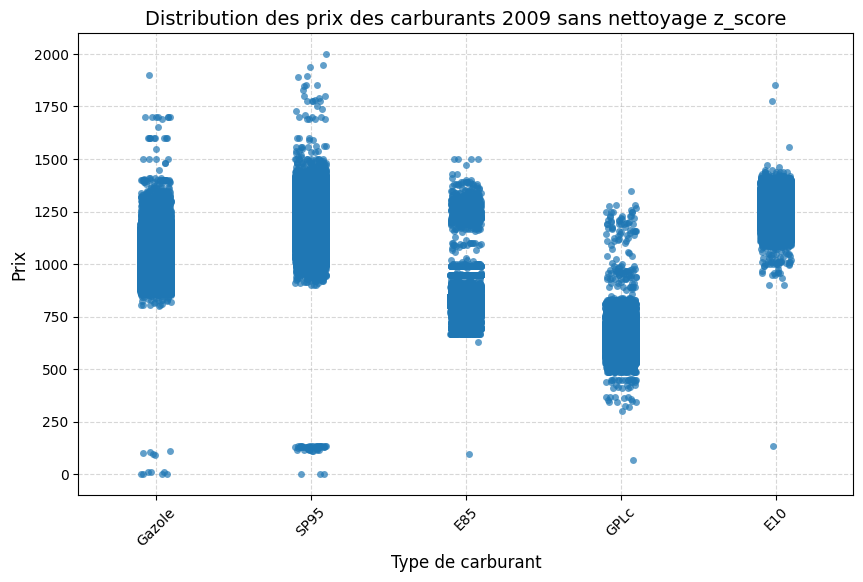

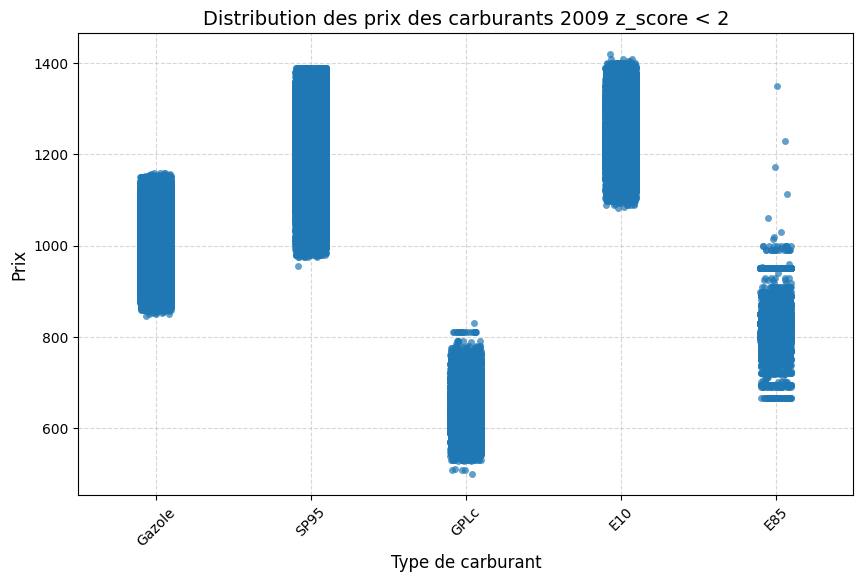

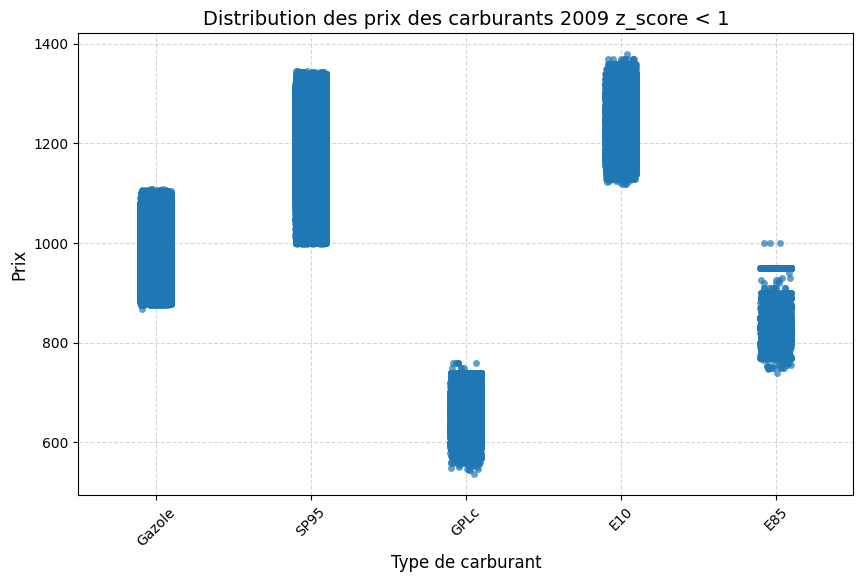

YEAR:  2010
['Gazole' 'SP95' 'GPLc' nan 'E10' 'E85']
val MAX Gazole [1740.0, 1740.0, 1730.0]
val MIN Gazole [1.0, 1.0, 1.0]
val MAX SP95 [1849.0, 1834.0, 1797.0]
val MIN SP95 [1.0, 13.0, 14.0]
val MAX GPLc [1500.0, 1500.0, 1477.0]
val MIN GPLc [72.0, 300.0, 374.0]
val MAX E10 [1850.0, 1790.0, 1700.0]
val MIN E10 [148.0, 900.0, 900.0]
val MAX E85 [1500.0, 1500.0, 1500.0]
val MIN E85 [600.0, 600.0, 600.0]


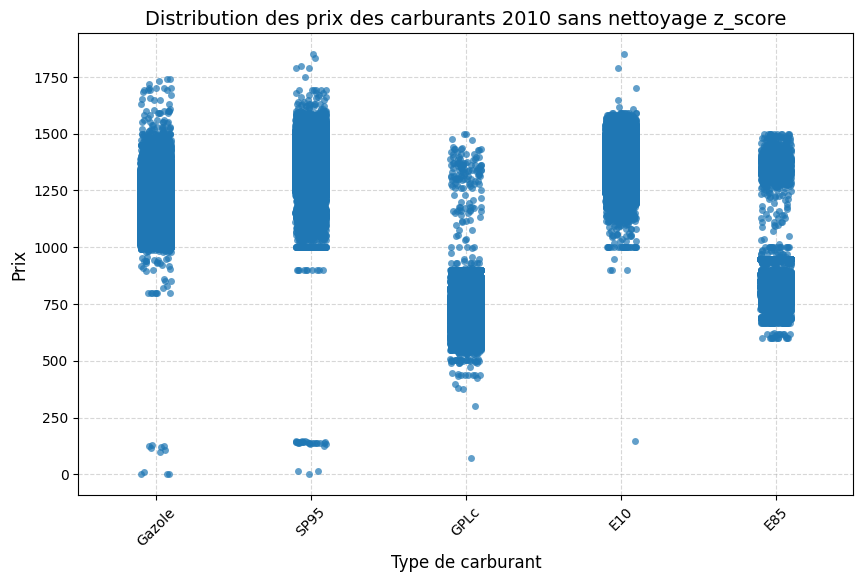

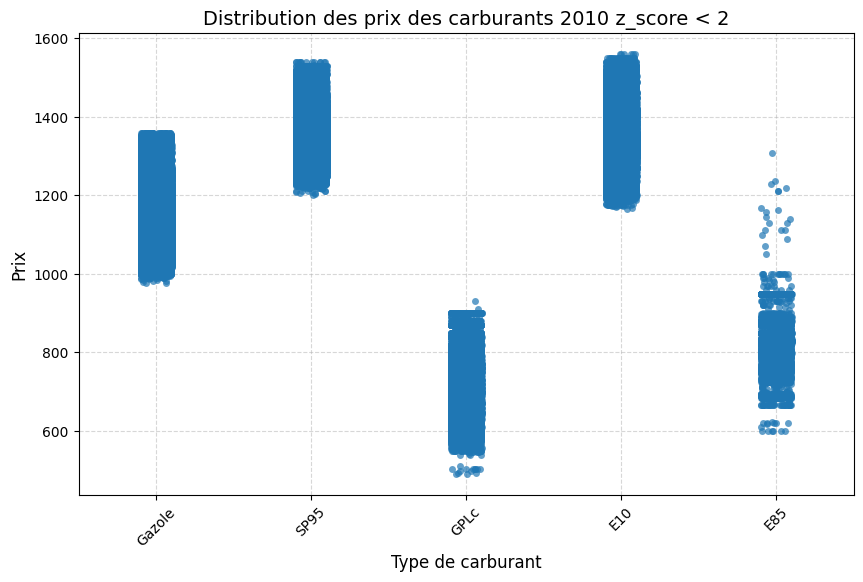

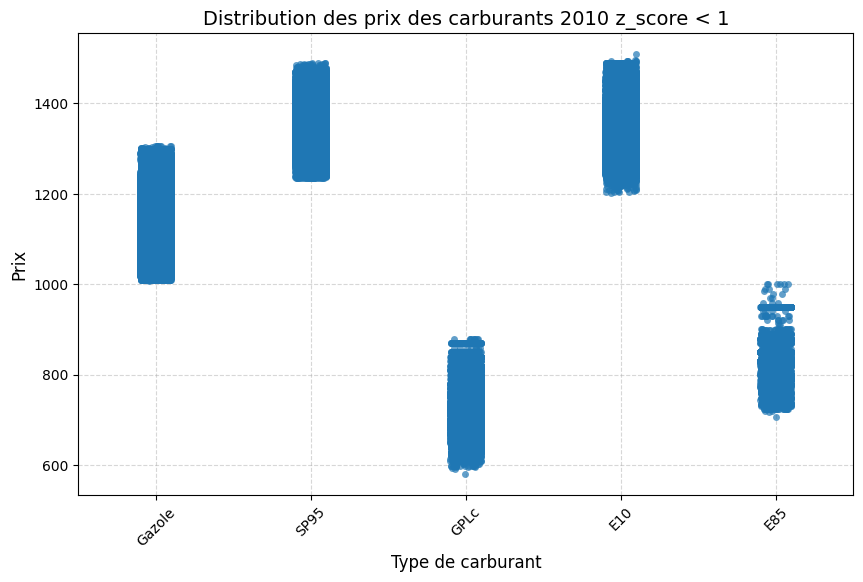

YEAR:  2011
['Gazole' 'SP95' 'GPLc' nan 'E10' 'E85']
val MAX Gazole [1773.0, 1740.0, 1736.0]
val MIN Gazole [1.0, 13.0, 13.0]
val MAX SP95 [1900.0, 1900.0, 1900.0]
val MIN SP95 [1.0, 15.0, 15.0]
val MAX GPLc [1499.0, 1498.0, 1498.0]
val MIN GPLc [85.0, 300.0, 300.0]
val MAX E10 [1839.0, 1838.0, 1810.0]
val MIN E10 [1.0, 15.0, 149.0]
val MAX E85 [1400.0, 1400.0, 1400.0]
val MIN E85 [95.0, 600.0, 601.0]


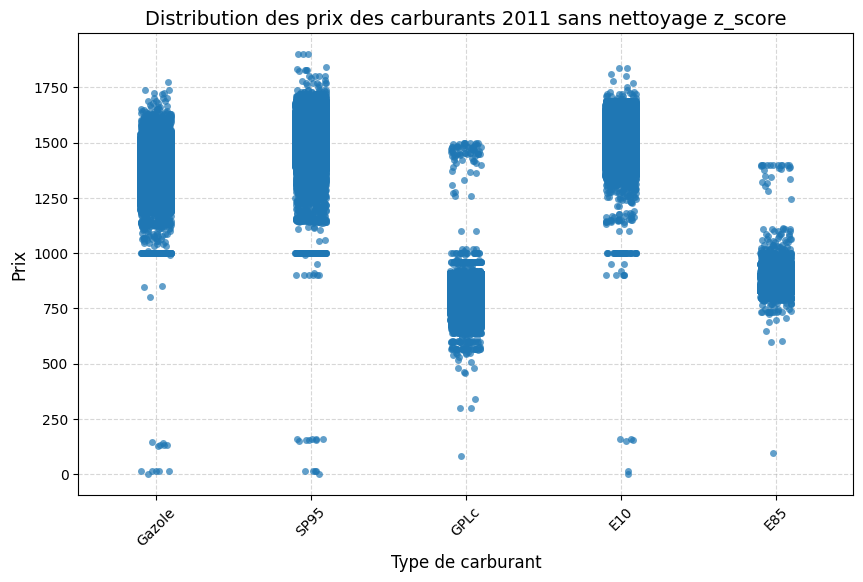

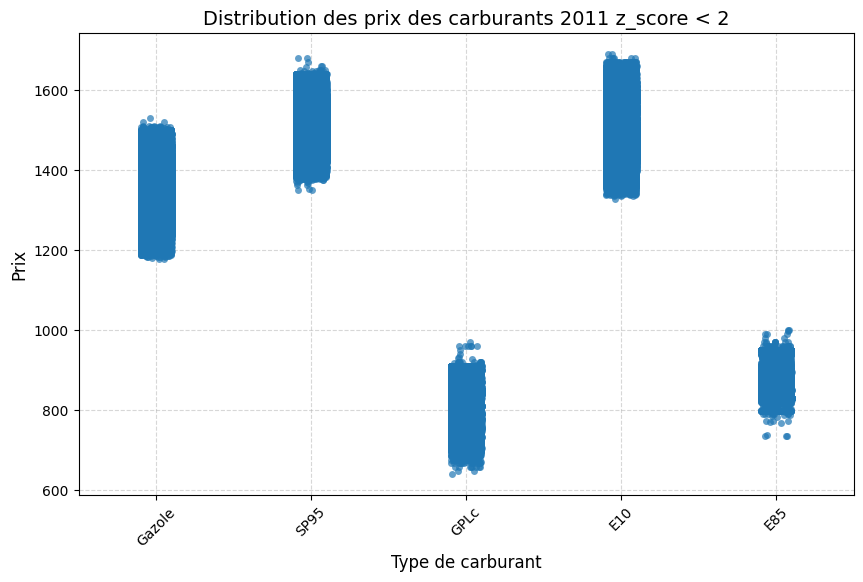

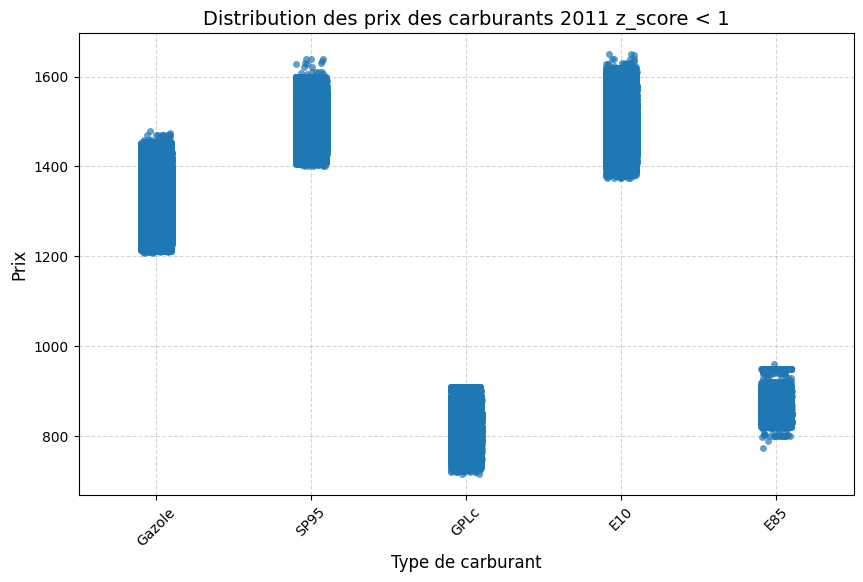

YEAR:  2012
['Gazole' 'SP95' 'GPLc' nan 'E10' 'E85']
val MAX Gazole [1900.0, 1900.0, 1900.0]
val MIN Gazole [1.0, 13.0, 14.0]
val MAX SP95 [2200.0, 2146.0, 2128.0]
val MIN SP95 [1.0, 158.0, 159.0]
val MAX GPLc [1390.0, 1338.0, 1333.0]
val MIN GPLc [549.0, 549.0, 549.0]
val MAX E10 [1880.0, 1860.0, 1860.0]
val MIN E10 [1.0, 16.0, 153.0]
val MAX E85 [1393.0, 1350.0, 1350.0]
val MIN E85 [95.0, 95.0, 95.0]


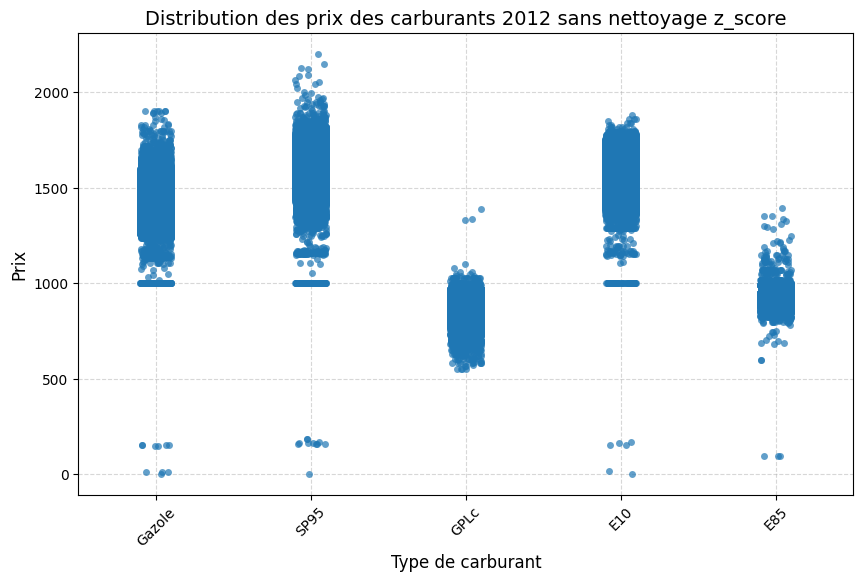

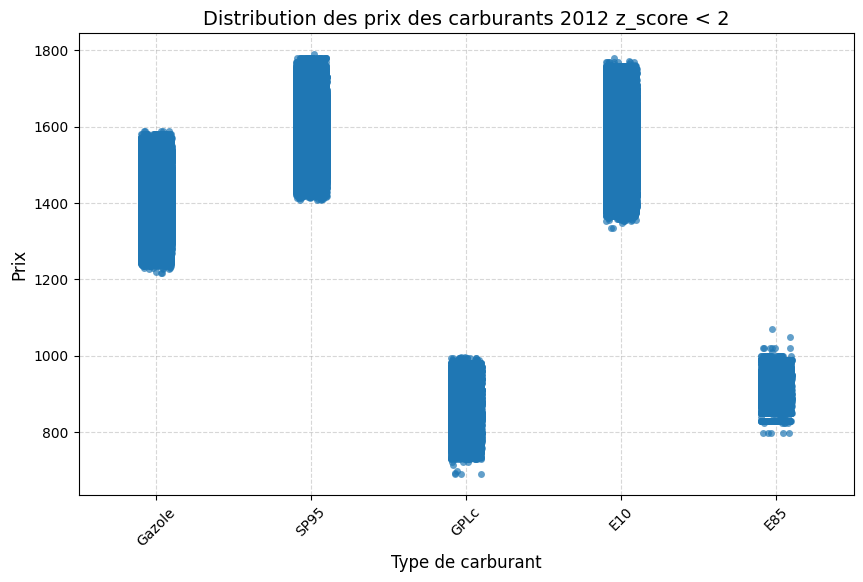

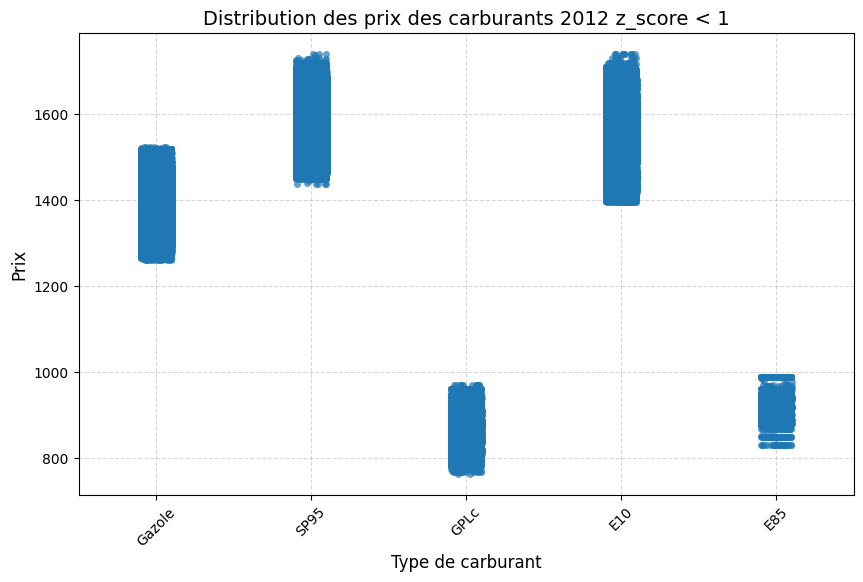

YEAR:  2013
['Gazole' 'SP95' 'SP98' 'GPLc' nan 'E10' 'E85']
val MAX Gazole [2000.0, 2000.0, 2000.0]
val MIN Gazole [13.0, 14.0, 129.0]
val MAX SP95 [2079.0, 2068.0, 2058.0]
val MIN SP95 [16.0, 153.0, 158.0]
val MAX SP98 [2000.0, 2000.0, 1999.0]
val MIN SP98 [162.0, 500.0, 500.0]
val MAX GPLc [1399.0, 1124.0, 1124.0]
val MIN GPLc [500.0, 574.0, 574.0]
val MAX E10 [1967.0, 1915.0, 1883.0]
val MIN E10 [161.0, 162.0, 165.0]
val MAX E85 [1400.0, 1400.0, 1399.0]
val MIN E85 [1.0, 700.0, 700.0]


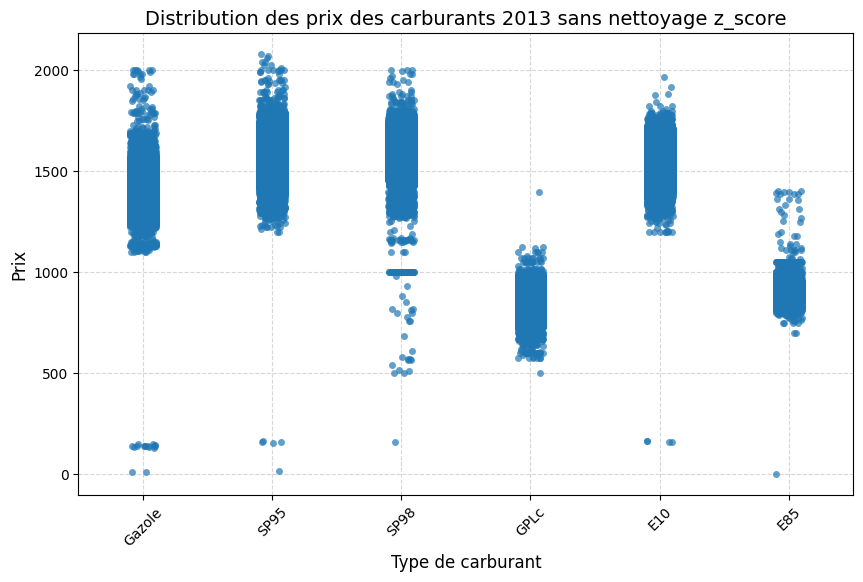

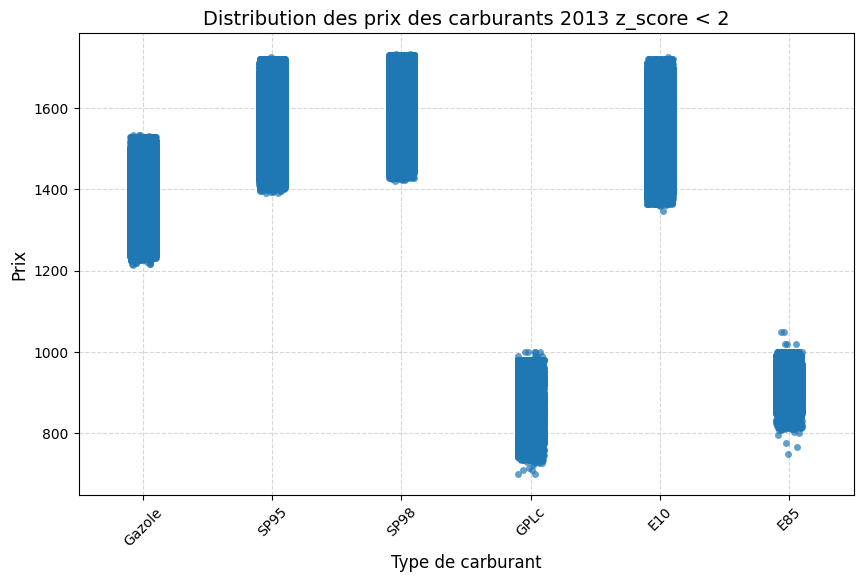

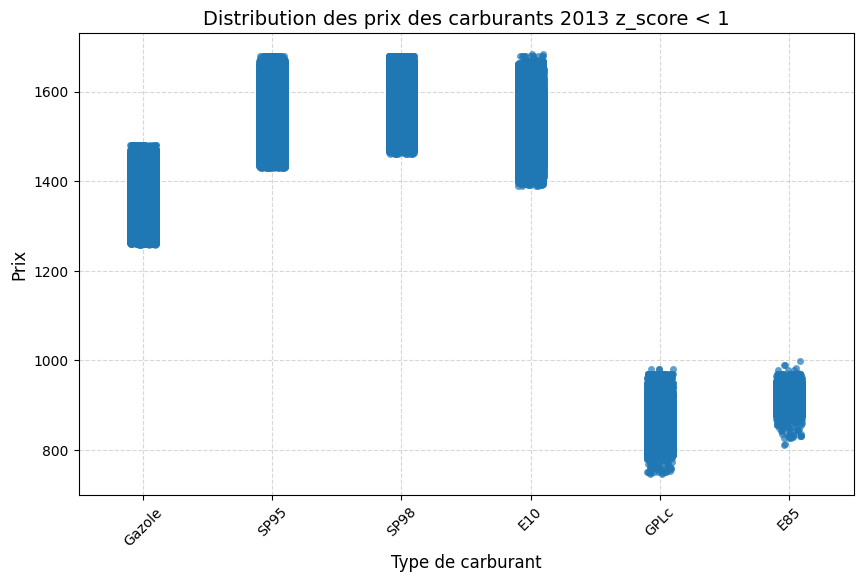

YEAR:  2014
['Gazole' 'SP95' 'SP98' 'GPLc' nan 'E10' 'E85']
val MAX Gazole [1999.0, 1999.0, 1999.0]
val MIN Gazole [945.0, 977.0, 981.0]
val MAX SP95 [2083.0, 2072.0, 2047.0]
val MIN SP95 [1125.0, 1128.0, 1138.0]
val MAX SP98 [2000.0, 2000.0, 1990.0]
val MIN SP98 [509.0, 518.0, 527.0]
val MAX GPLc [1200.0, 1200.0, 1111.0]
val MIN GPLc [500.0, 500.0, 503.0]
val MAX E10 [2000.0, 2000.0, 1999.0]
val MIN E10 [1000.0, 1000.0, 1000.0]
val MAX E85 [1400.0, 1400.0, 1400.0]
val MIN E85 [600.0, 600.0, 600.0]


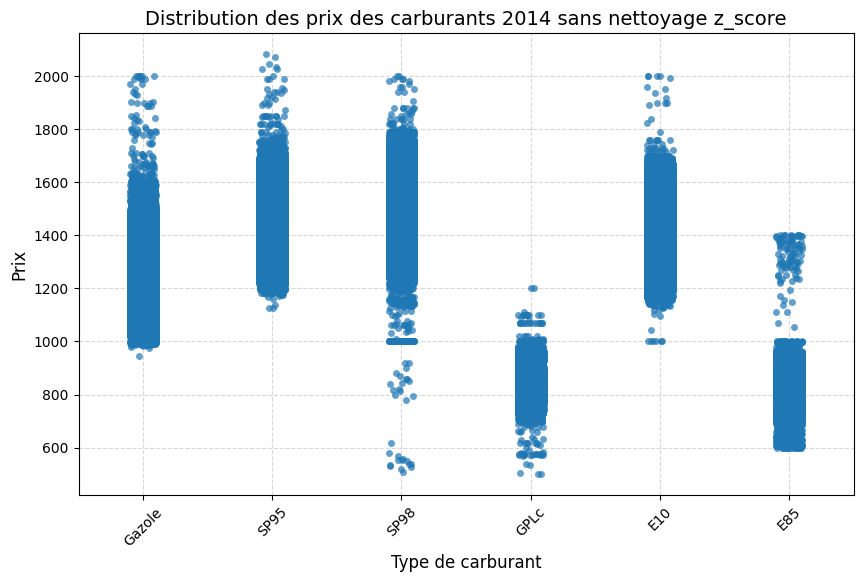

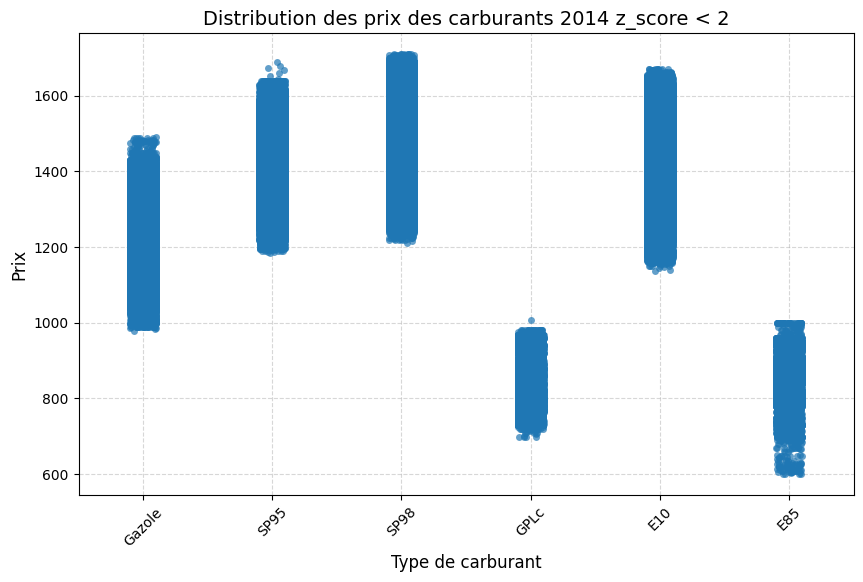

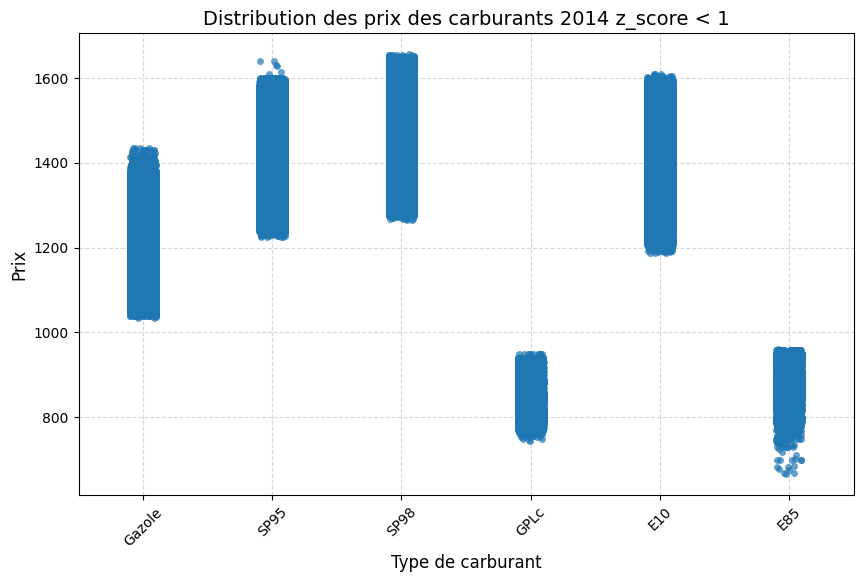

YEAR:  2015
['Gazole' 'SP95' 'E10' 'SP98' 'GPLc' nan 'E85']
val MAX Gazole [2000.0, 1999.0, 1999.0]
val MIN Gazole [702.0, 759.0, 771.0]
val MAX SP95 [2100.0, 2055.0, 1999.0]
val MIN SP95 [1100.0, 1100.0, 1100.0]
val MAX E10 [1999.0, 1922.0, 1888.0]
val MIN E10 [979.0, 1000.0, 1000.0]
val MAX SP98 [1993.0, 1980.0, 1960.0]
val MIN SP98 [500.0, 500.0, 689.0]
val MAX GPLc [1196.0, 1179.0, 1178.0]
val MIN GPLc [196.0, 444.0, 444.0]
val MAX E85 [1400.0, 1400.0, 1400.0]
val MIN E85 [350.0, 361.0, 369.0]


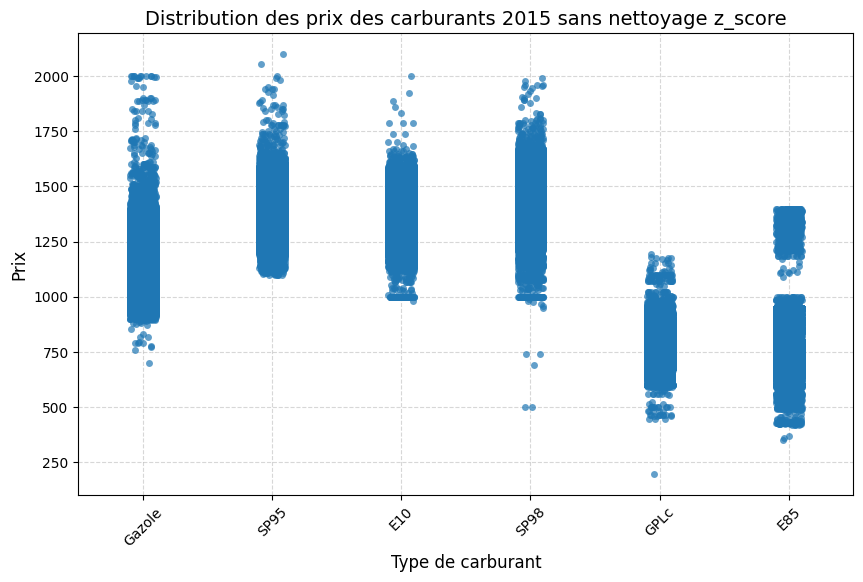

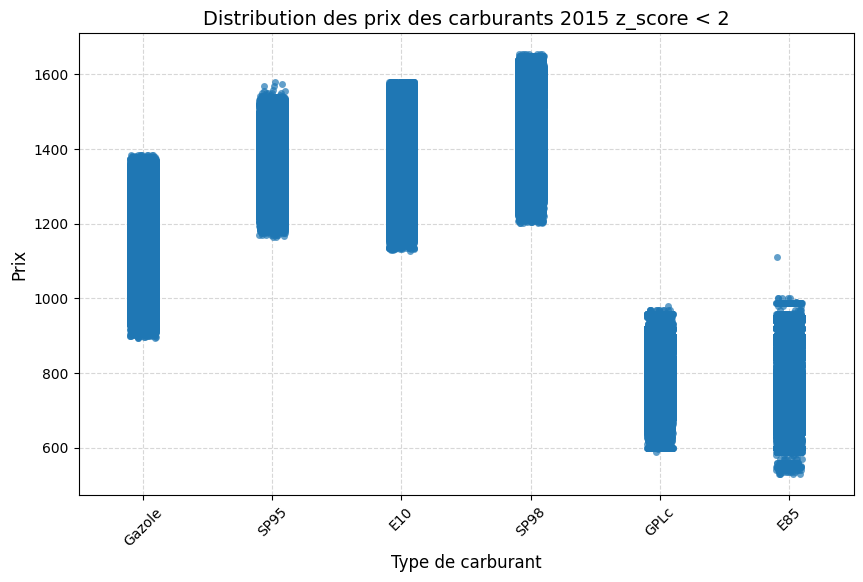

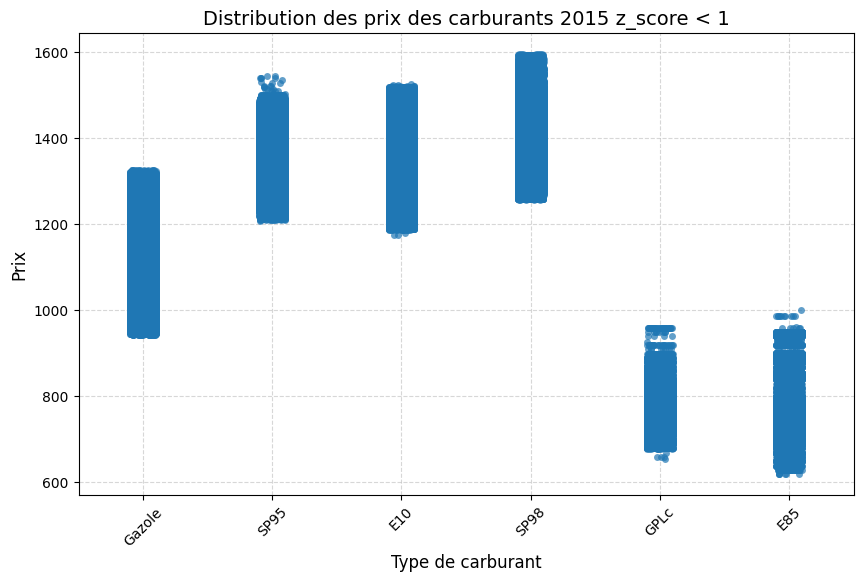

YEAR:  2016
['Gazole' 'SP95' 'SP98' 'GPLc' nan 'E10' 'E85']
val MAX Gazole [1903.0, 1900.0, 1900.0]
val MIN Gazole [109.0, 700.0, 708.0]
val MAX SP95 [1989.0, 1950.0, 1950.0]
val MIN SP95 [709.0, 790.0, 959.0]
val MAX SP98 [1970.0, 1970.0, 1960.0]
val MIN SP98 [699.0, 912.0, 970.0]
val MAX GPLc [1200.0, 1199.0, 1189.0]
val MIN GPLc [1.0, 1.0, 1.0]
val MAX E10 [1888.0, 1888.0, 1888.0]
val MIN E10 [699.0, 700.0, 700.0]
val MAX E85 [1400.0, 1400.0, 1399.0]
val MIN E85 [1.0, 1.0, 1.0]


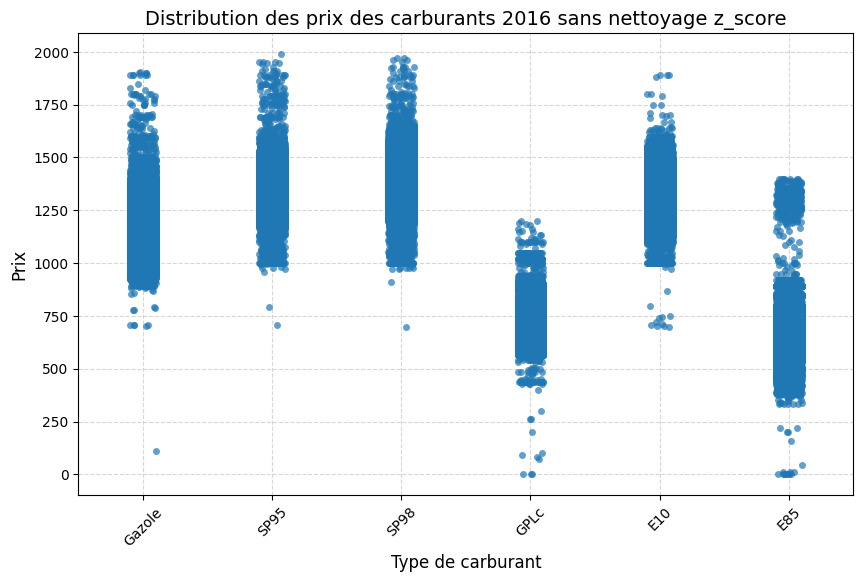

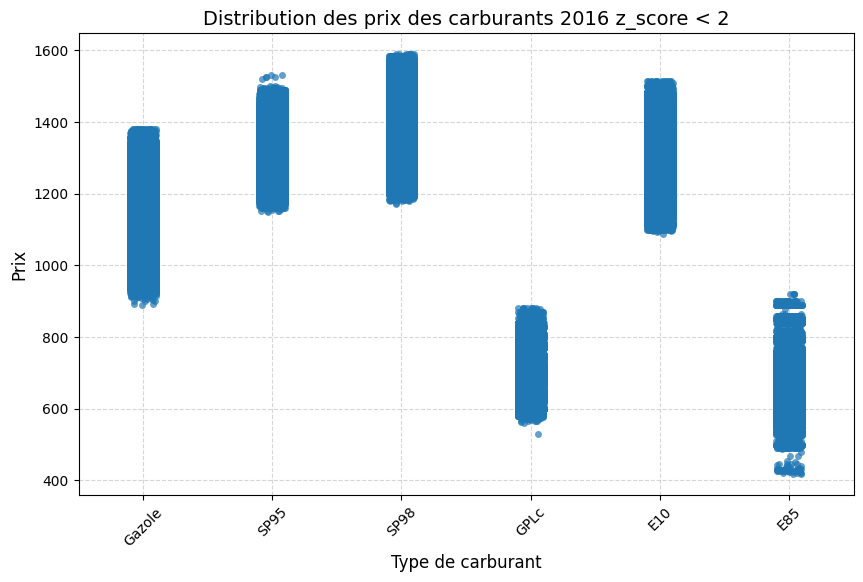

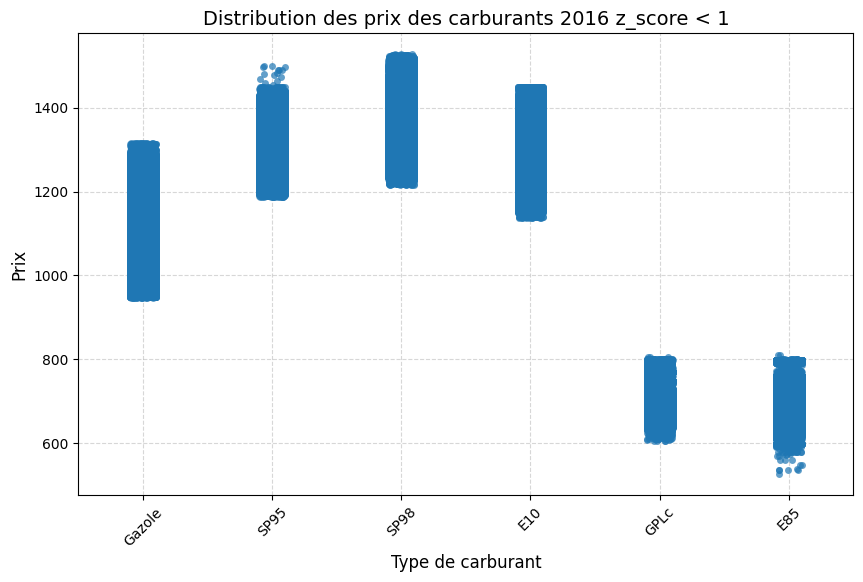

YEAR:  2017
['Gazole' 'SP95' 'SP98' 'GPLc' nan 'E10' 'E85']
val MAX Gazole [2259.0, 2249.0, 2249.0]
val MIN Gazole [202.0, 208.0, 210.0]
val MAX SP95 [4419.0, 4392.0, 1999.0]
val MIN SP95 [344.0, 345.0, 349.0]
val MAX SP98 [2137.0, 1984.0, 1960.0]
val MIN SP98 [144.0, 380.0, 382.0]
val MAX GPLc [1930.0, 1715.0, 1714.0]
val MIN GPLc [1.0, 1.0, 1.0]
val MAX E10 [4494.0, 4415.0, 4373.0]
val MIN E10 [279.0, 281.0, 299.0]
val MAX E85 [1575.0, 1449.0, 1435.0]
val MIN E85 [1.0, 1.0, 1.0]


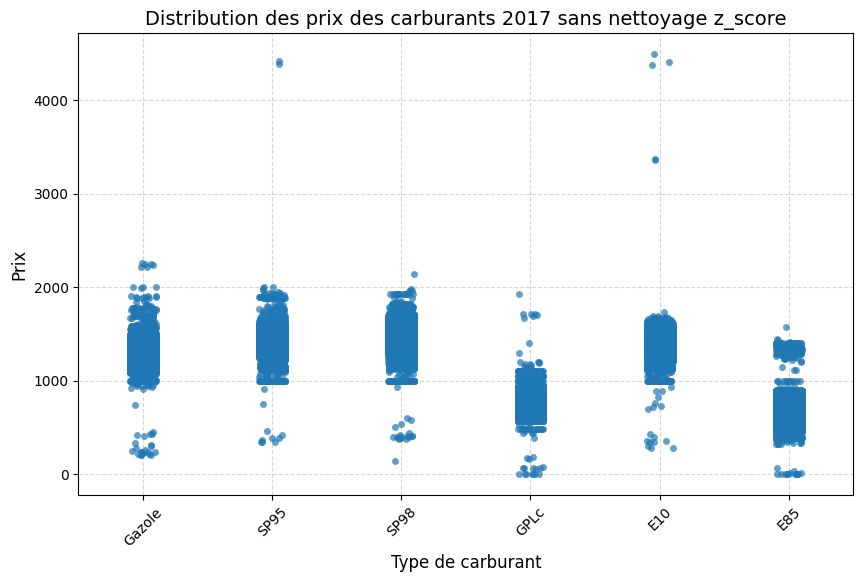

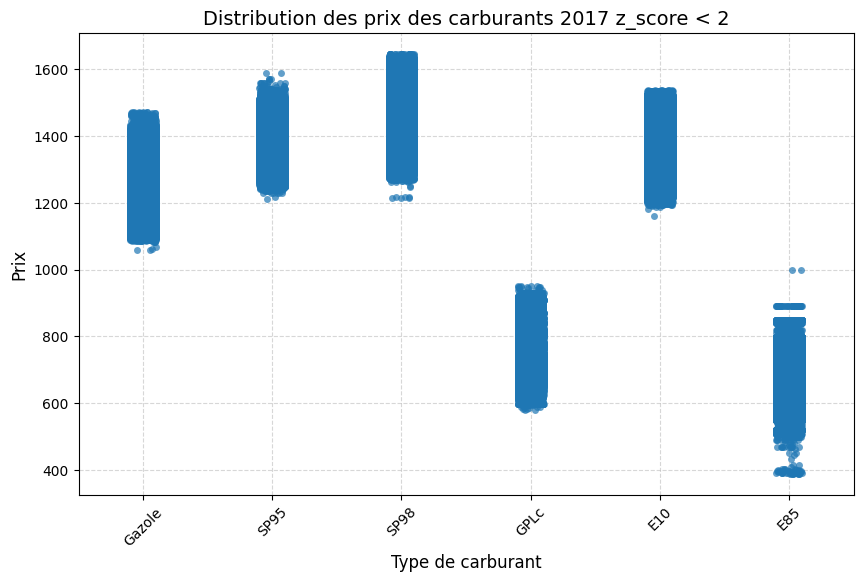

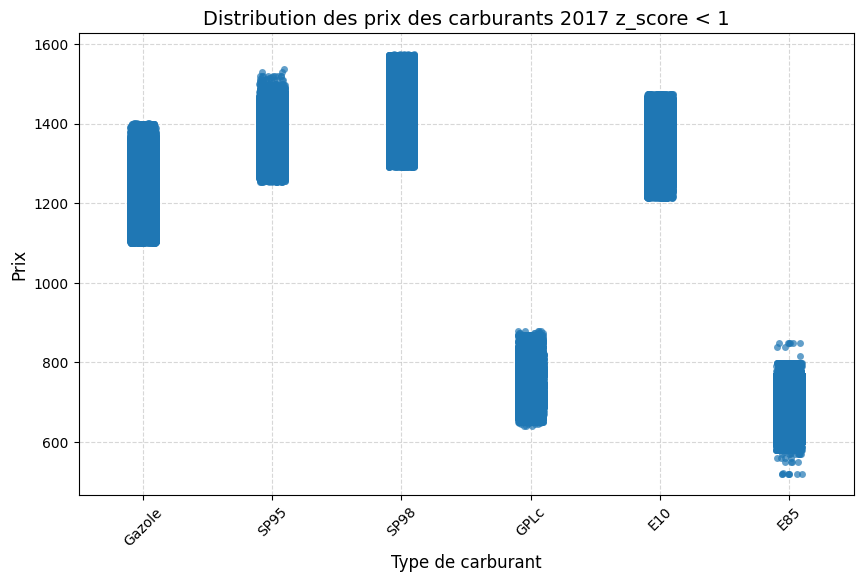

YEAR:  2018
['Gazole' 'SP95' 'E10' 'SP98' 'GPLc' nan 'E85']
val MAX Gazole [5530.0, 5515.0, 5499.0]
val MIN Gazole [138.0, 139.0, 308.0]
val MAX SP95 [6000.0, 5552.0, 5549.0]
val MIN SP95 [152.0, 371.0, 404.0]
val MAX E10 [7702.0, 5519.0, 5000.0]
val MIN E10 [134.0, 341.0, 361.0]
val MAX SP98 [6677.0, 6619.0, 5000.0]
val MIN SP98 [158.0, 449.0, 449.0]
val MAX GPLc [9999.0, 6959.0, 1990.0]
val MIN GPLc [1.0, 1.0, 1.0]
val MAX E85 [7749.0, 1849.0, 1750.0]
val MIN E85 [1.0, 1.0, 1.0]


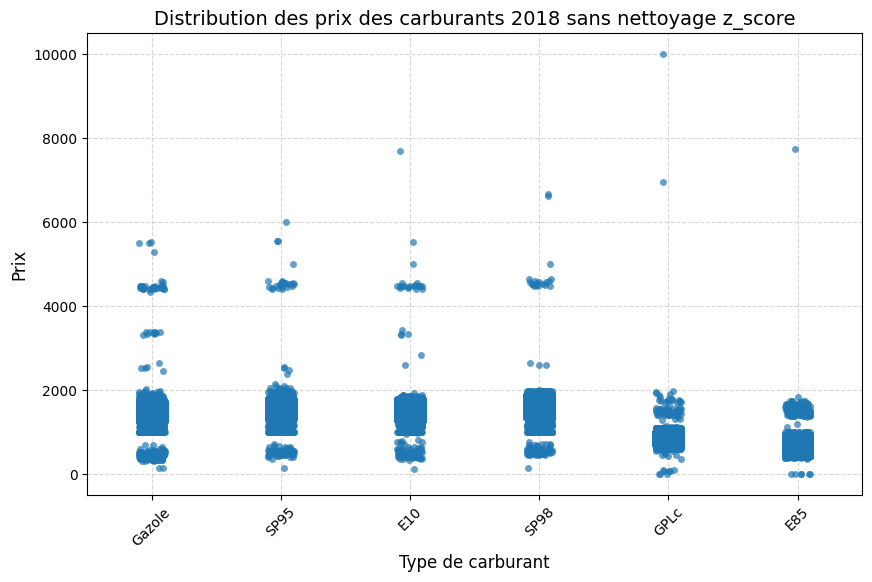

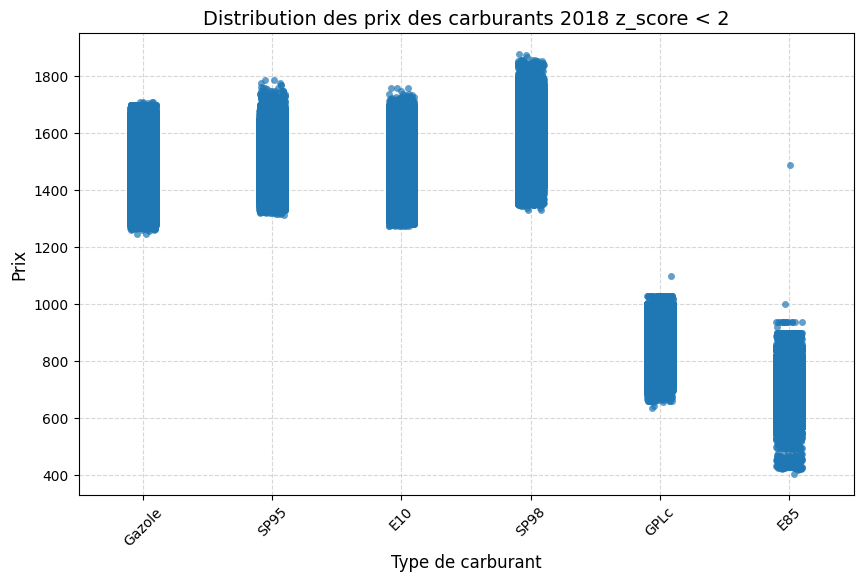

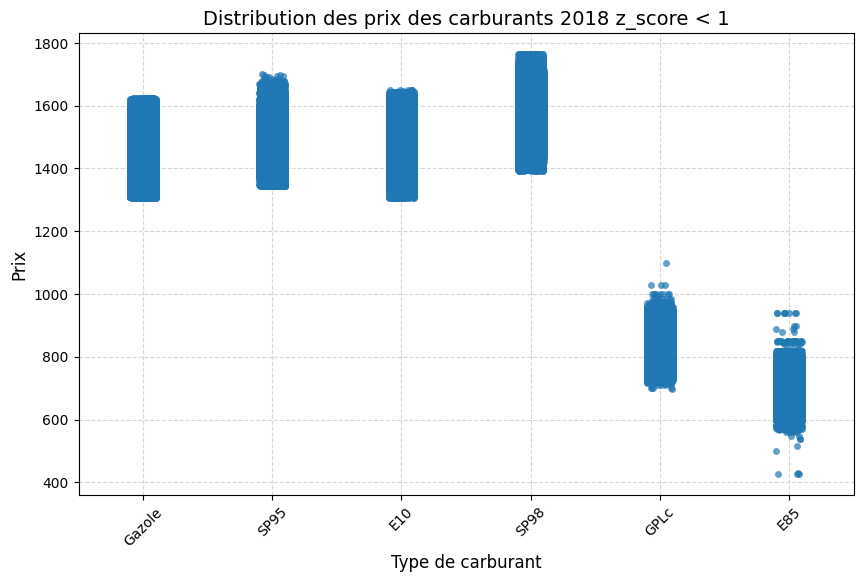

YEAR:  2019
['Gazole' 'SP95' 'SP98' 'GPLc' nan 'E10' 'E85']
val MAX Gazole [4640.0, 4536.0, 4529.0]
val MIN Gazole [136.0, 348.0, 349.0]
val MAX SP95 [8888.0, 5000.0, 5000.0]
val MIN SP95 [46.0, 389.0, 420.0]
val MAX SP98 [7589.0, 6659.0, 6606.0]
val MIN SP98 [372.0, 434.0, 439.0]
val MAX GPLc [5000.0, 2500.0, 1910.0]
val MIN GPLc [1.0, 1.0, 1.0]
val MAX E10 [6549.0, 5530.0, 5529.0]
val MIN E10 [42.0, 135.0, 349.0]
val MAX E85 [1804.0, 1760.0, 1725.0]
val MIN E85 [1.0, 1.0, 1.0]


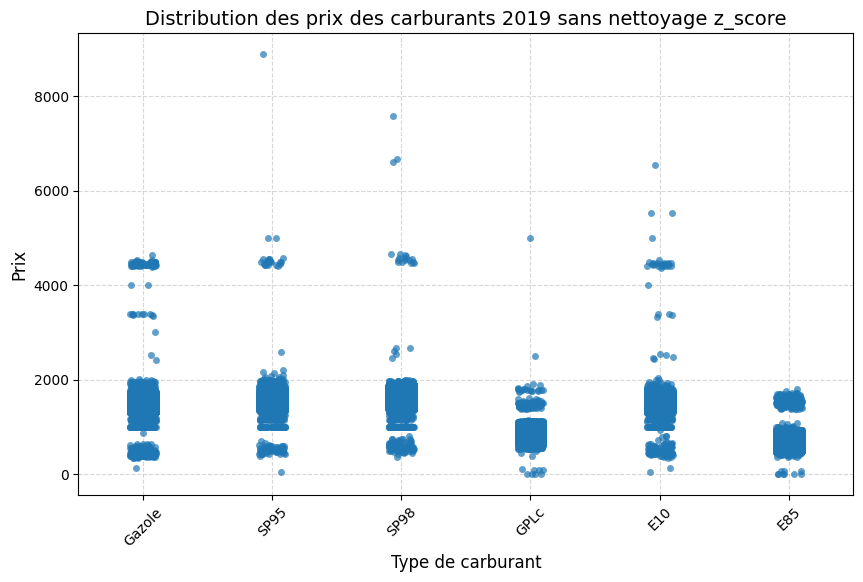

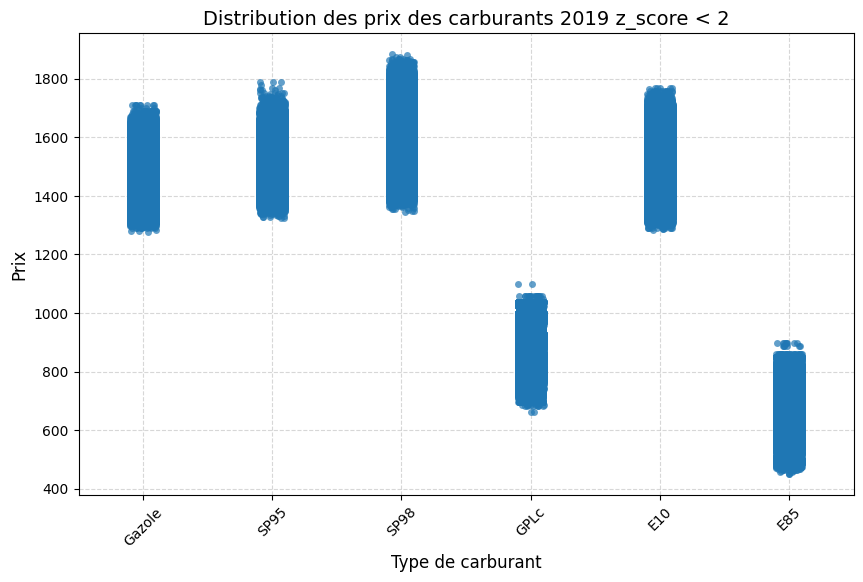

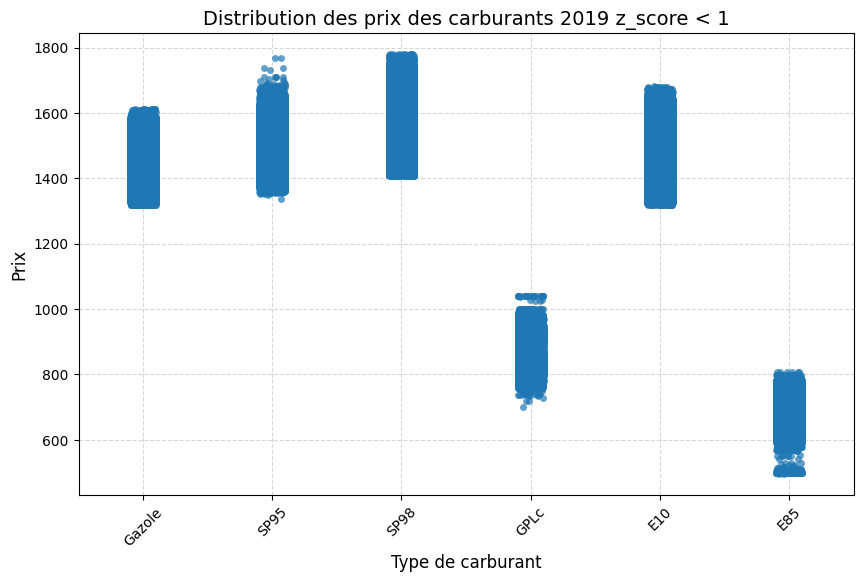

YEAR:  2020
['Gazole' 'SP95' 'SP98' 'GPLc' nan 'E10' 'E85']
val MAX Gazole [4480.0, 4459.0, 4438.0]
val MIN Gazole [106.0, 109.0, 128.0]
val MAX SP95 [6652.0, 4539.0, 4512.0]
val MIN SP95 [132.0, 154.0, 185.0]
val MAX SP98 [5000.0, 4814.0, 4624.0]
val MIN SP98 [305.0, 309.0, 321.0]
val MAX GPLc [2789.0, 1999.0, 1969.0]
val MIN GPLc [1.0, 1.0, 1.0]
val MAX E10 [8433.0, 7309.0, 4484.0]
val MIN E10 [145.0, 181.0, 199.0]
val MAX E85 [3699.0, 3699.0, 3699.0]
val MIN E85 [1.0, 1.0, 52.0]


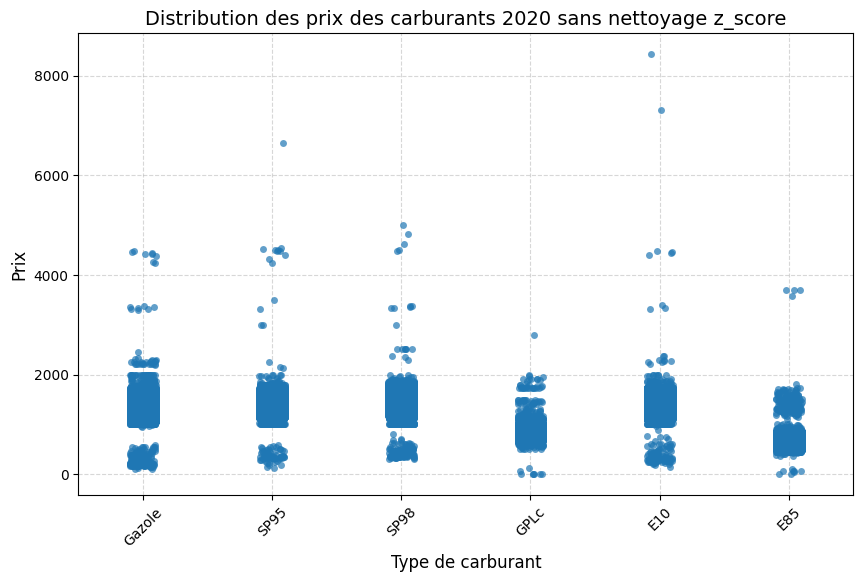

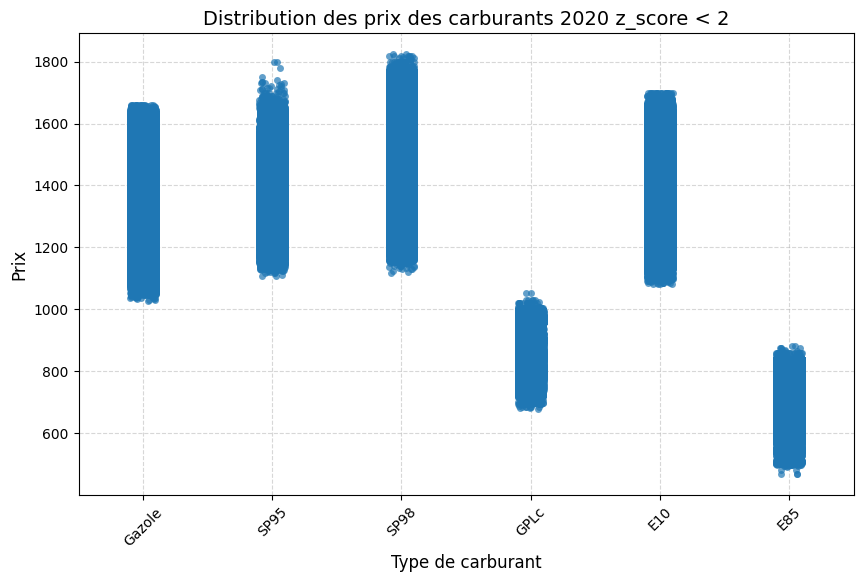

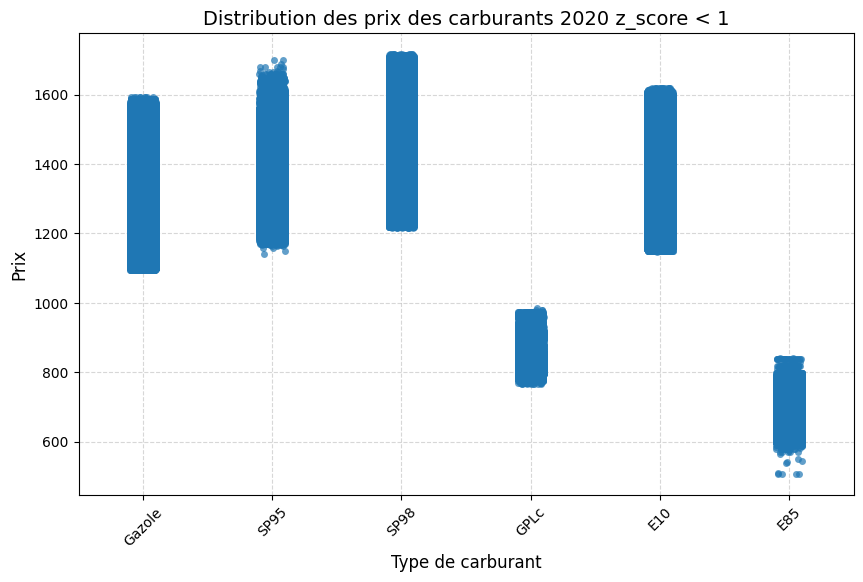

YEAR:  2021
['Gazole' 'SP95' 'SP98' 'GPLc' nan 'E10' 'E85']
val MAX Gazole [8888.0, 5515.0, 5000.0]
val MIN Gazole [150.0, 269.0, 278.0]
val MAX SP95 [4639.0, 4606.0, 4599.0]
val MIN SP95 [10.0, 397.0, 405.0]
val MAX SP98 [8888.0, 8000.0, 7789.0]
val MIN SP98 [10.0, 150.0, 389.0]
val MAX GPLc [1999.0, 1999.0, 1899.0]
val MIN GPLc [1.0, 1.0, 1.0]
val MAX E10 [8888.0, 7709.0, 6687.0]
val MIN E10 [100.0, 334.0, 348.0]
val MAX E85 [9659.0, 9659.0, 8888.0]
val MIN E85 [1.0, 1.0, 67.0]


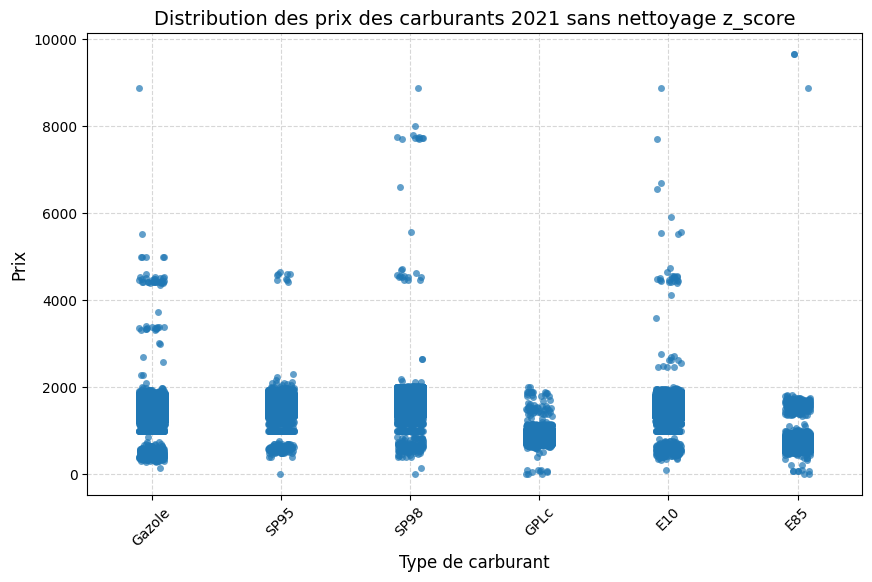

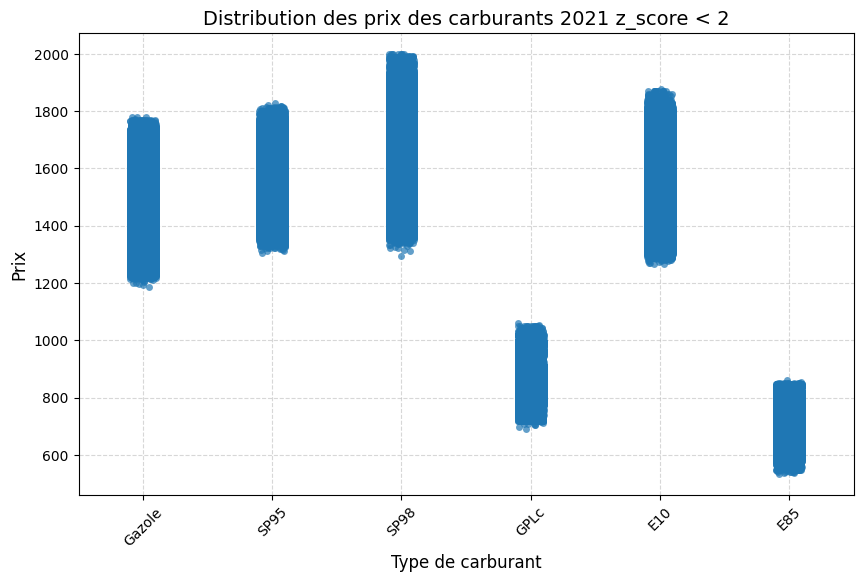

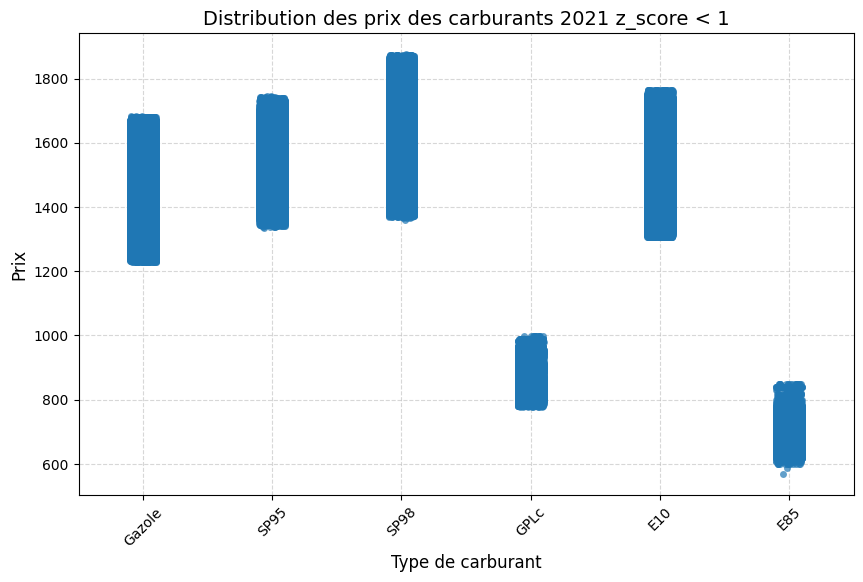

YEAR:  2022
['Gazole' 'SP95' 'SP98' nan 'E85' 'GPLc' 'E10']
val MAX Gazole [9999.0, 9999.0, 9999.0]
val MIN Gazole [1.0, 15.0, 19.0]
val MAX SP95 [9999.0, 9999.0, 9999.0]
val MIN SP95 [4.0, 29.0, 99.0]
val MAX SP98 [9999.0, 9999.0, 9999.0]
val MIN SP98 [1.0, 45.0, 75.0]
val MAX E85 [9969.0, 8790.0, 7777.0]
val MIN E85 [1.0, 1.0, 29.0]
val MAX GPLc [7000.0, 2946.0, 2494.0]
val MIN GPLc [19.0, 63.0, 129.0]
val MAX E10 [9999.0, 9999.0, 9999.0]
val MIN E10 [1.0, 18.0, 27.0]


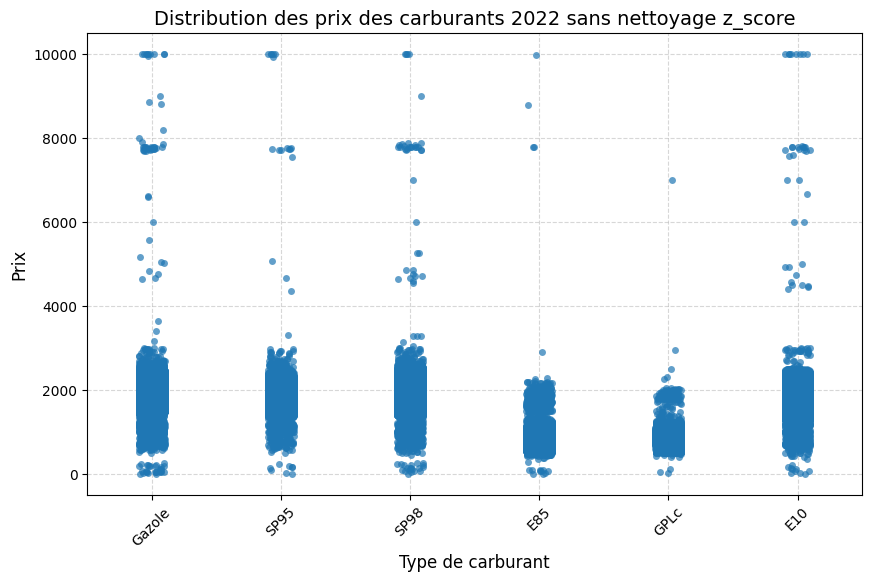

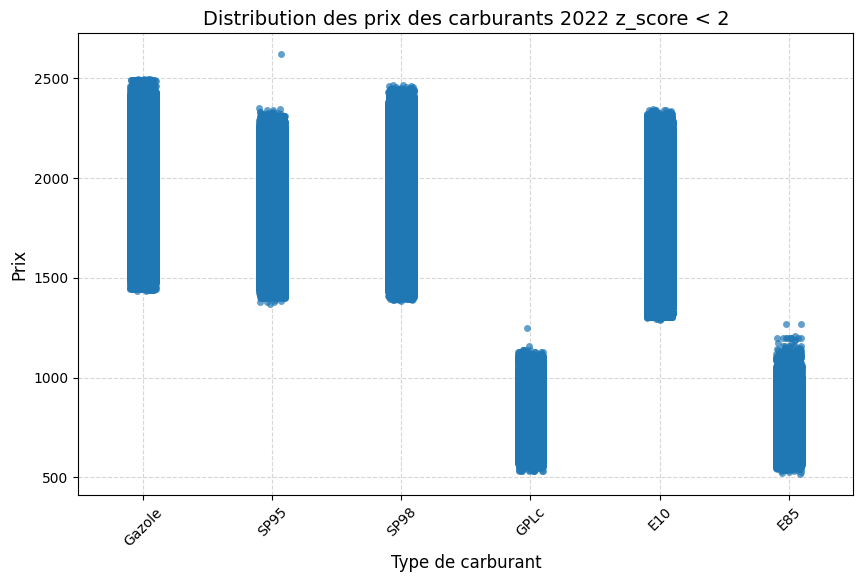

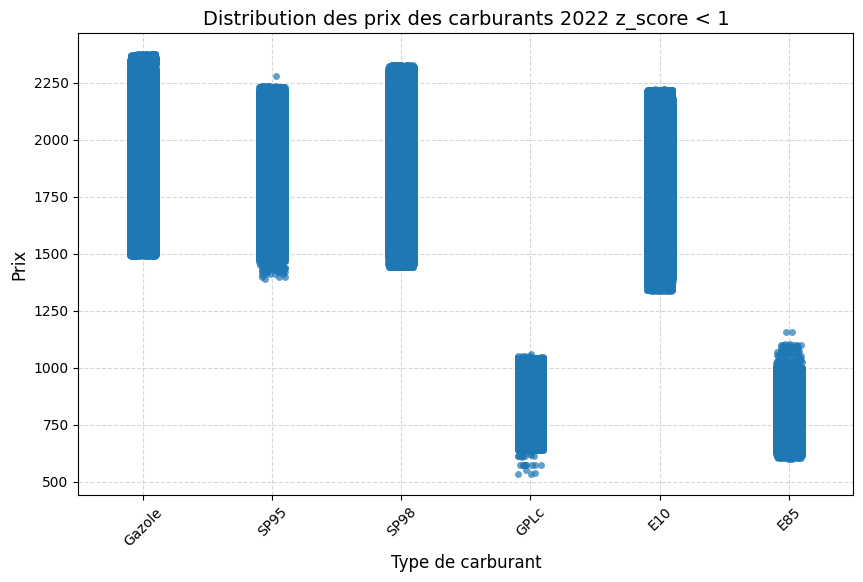

YEAR:  2023
['Gazole' 'SP95' 'E85' 'E10' 'SP98' 'GPLc' nan]
val MAX Gazole [9919.0, 9000.0, 8819.0]
val MIN Gazole [4.0, 100.0, 175.0]
val MAX SP95 [9000.0, 8919.0, 8866.0]
val MIN SP95 [49.0, 70.0, 719.0]
val MAX E85 [9989.0, 7777.0, 7000.0]
val MIN E85 [19.0, 19.0, 25.0]
val MAX E10 [9949.0, 9919.0, 7923.0]
val MIN E10 [40.0, 187.0, 193.0]
val MAX SP98 [9970.0, 9819.0, 8876.0]
val MIN SP98 [19.0, 24.0, 29.0]
val MAX GPLc [2837.0, 2444.0, 2119.0]
val MIN GPLc [19.0, 20.0, 31.0]


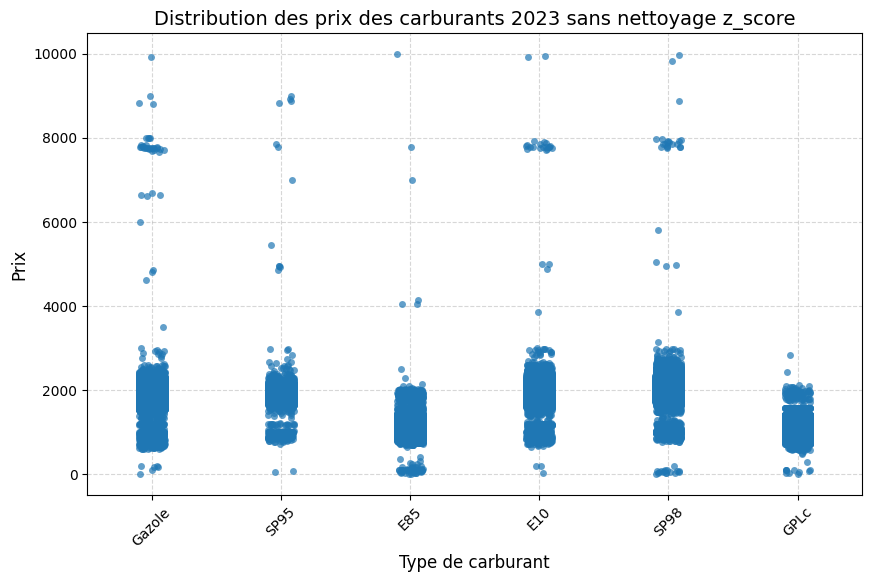

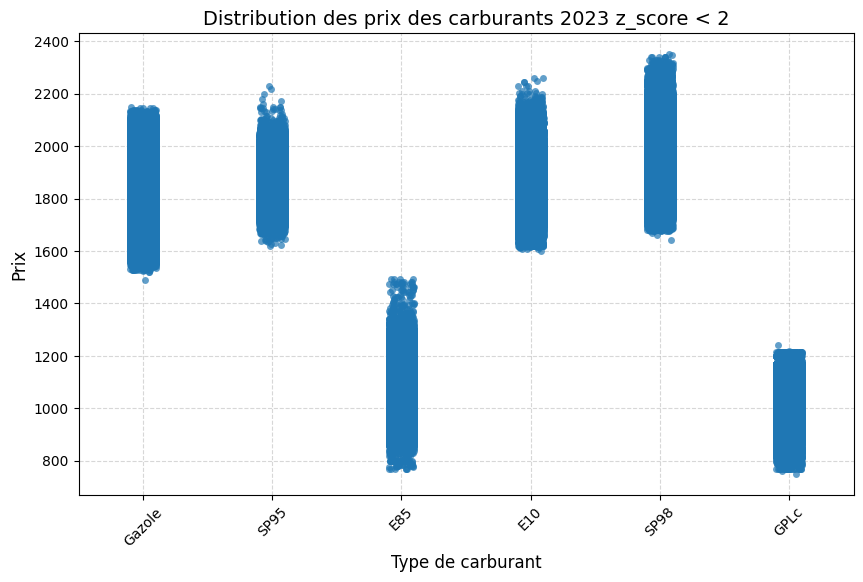

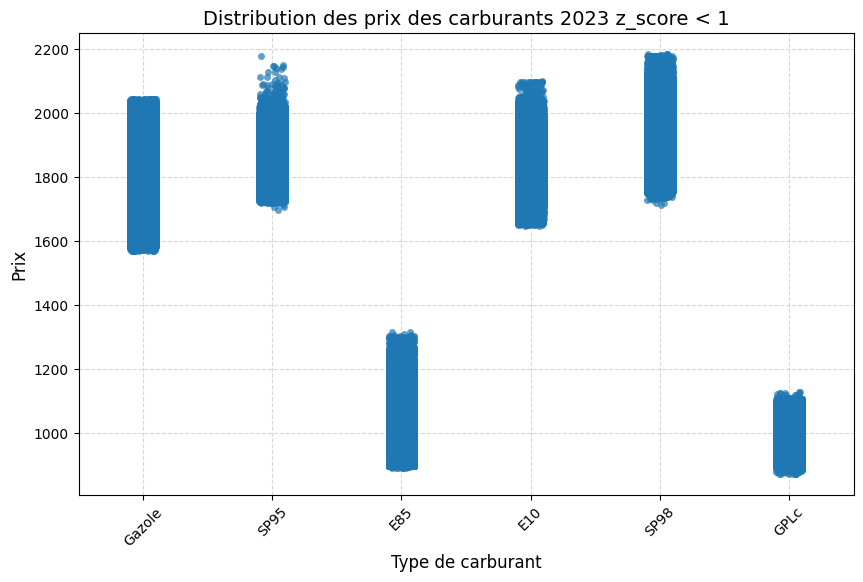

YEAR:  2024
['Gazole' 'SP95' 'E85' 'E10' 'SP98' 'GPLc' nan]
val MAX Gazole [7765.0, 7765.0, 7765.0]
val MIN Gazole [644.0, 669.0, 690.0]
val MAX SP95 [7809.0, 7769.0, 2839.0]
val MIN SP95 [745.0, 775.0, 779.0]
val MAX E85 [9919.0, 2026.0, 1999.0]
val MIN E85 [19.0, 99.0, 475.0]
val MAX E10 [7750.0, 7708.0, 4775.0]
val MIN E10 [709.0, 710.0, 720.0]
val MAX SP98 [7870.0, 7829.0, 7799.0]
val MIN SP98 [799.0, 805.0, 809.0]
val MAX GPLc [1999.0, 1980.0, 1967.0]
val MIN GPLc [38.0, 250.0, 576.0]


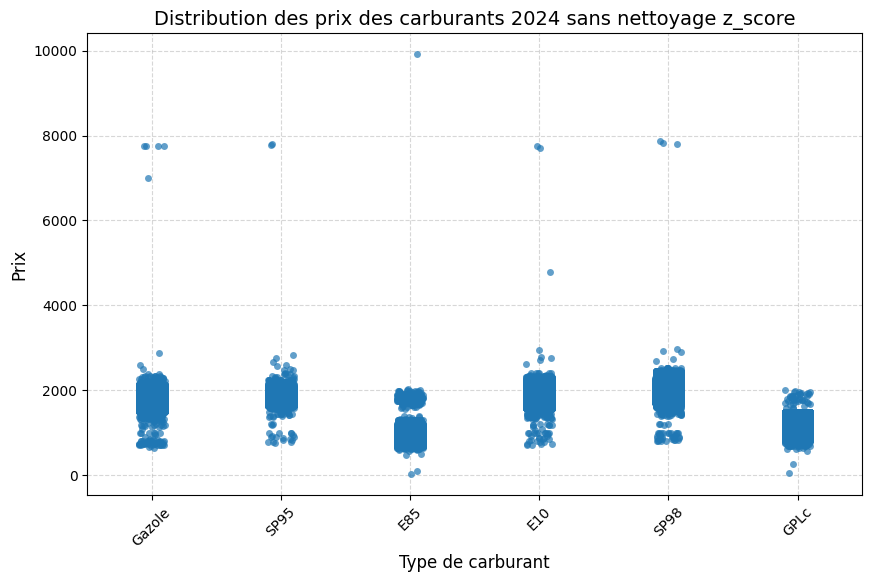

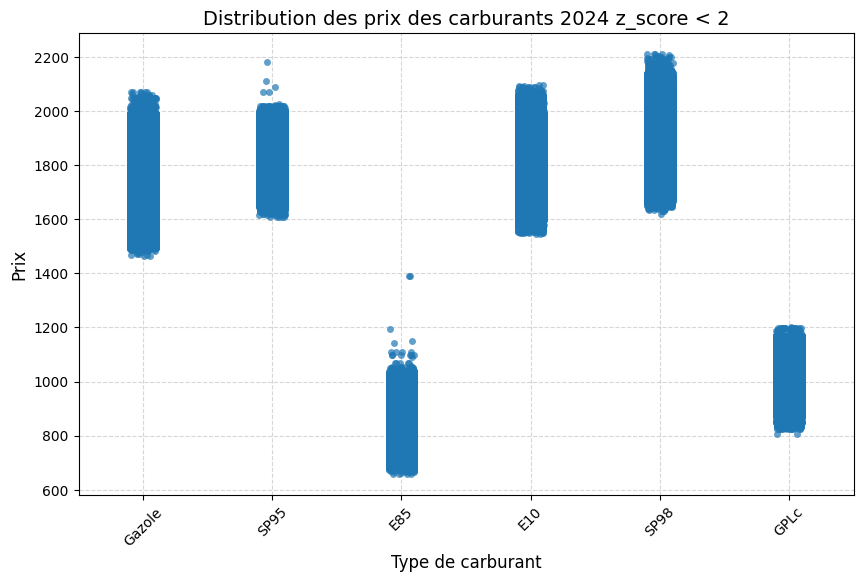

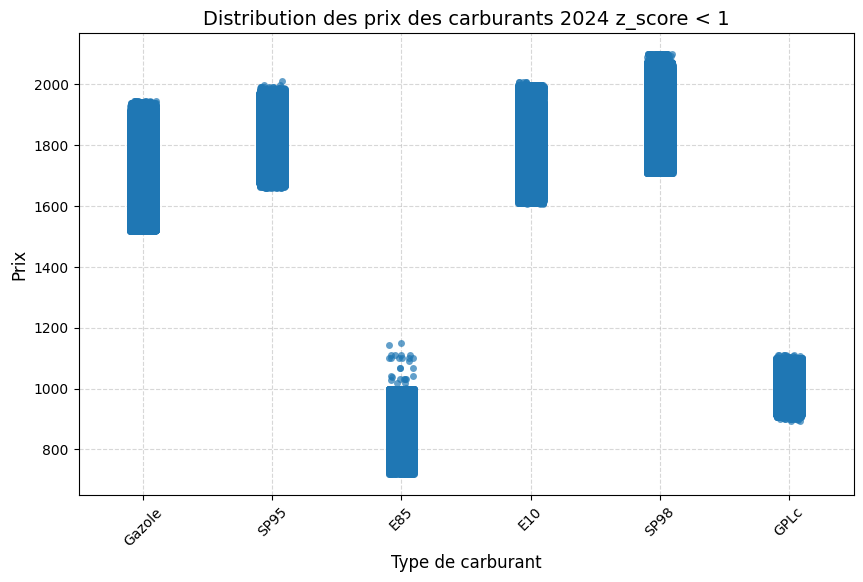

YEAR:  2025
['Gazole' 'SP95' 'E85' 'E10' 'SP98' 'GPLc' nan]
val MAX Gazole [2686.0, 2390.0, 2280.0]
val MIN Gazole [1259.0, 1298.0, 1333.0]
val MAX SP95 [2889.0, 2332.0, 2314.0]
val MIN SP95 [1414.0, 1434.0, 1436.0]
val MAX E85 [1959.0, 1959.0, 1919.0]
val MIN E85 [427.0, 427.0, 428.0]
val MAX E10 [2455.0, 2455.0, 2224.0]
val MIN E10 [1347.0, 1350.0, 1371.0]
val MAX SP98 [2889.0, 2460.0, 2364.0]
val MIN SP98 [1422.0, 1436.0, 1458.0]
val MAX GPLc [1989.0, 1989.0, 1960.0]
val MIN GPLc [758.0, 790.0, 799.0]


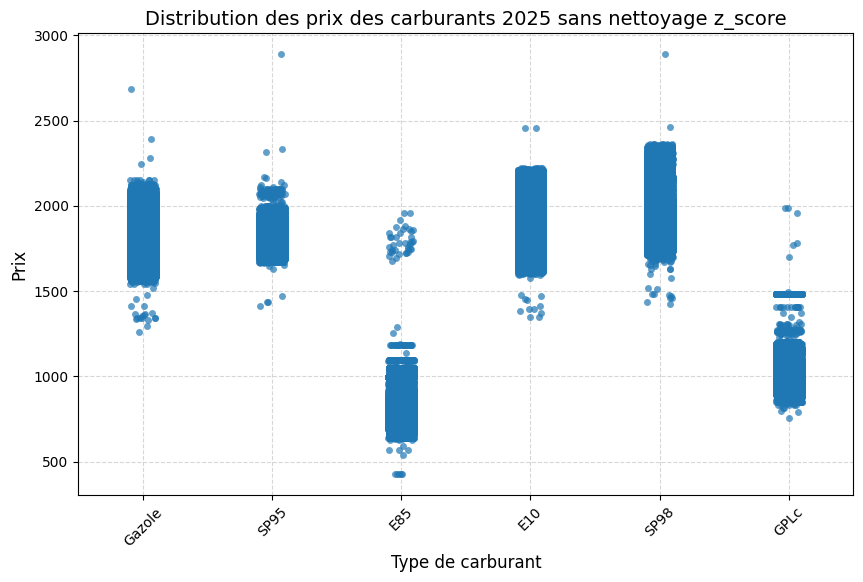

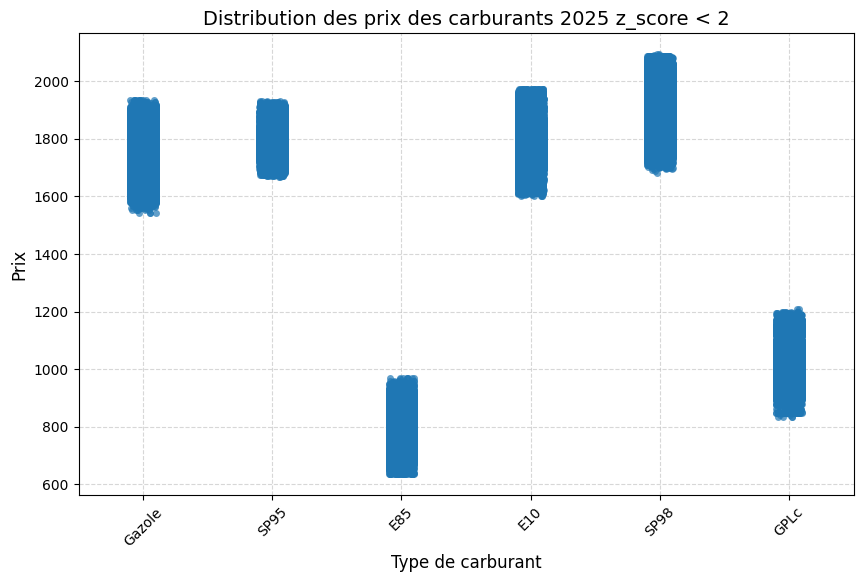

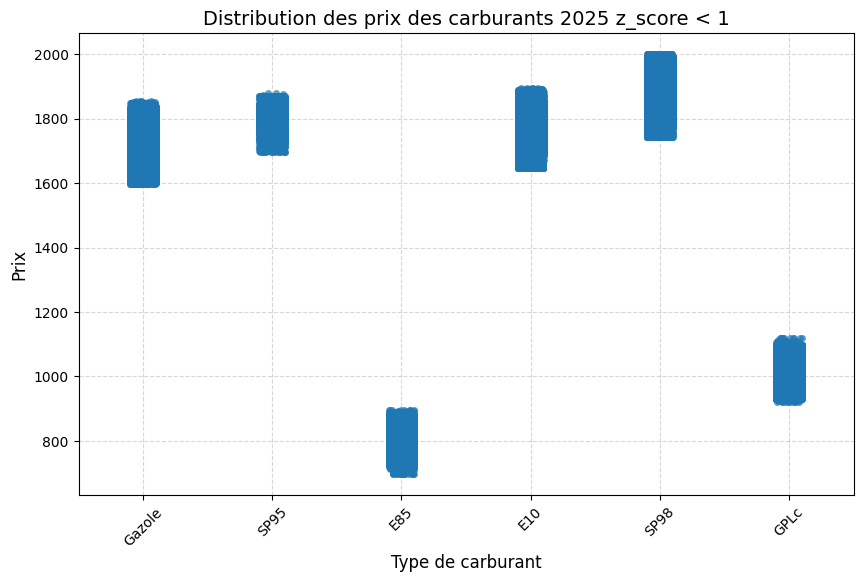

In [1]:
import pandas as pd
import os
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=RuntimeWarning)

# for i in range(1): # one year only
#     year = 2007
for i in range (19): # all years
    year = 2007+i
    print("YEAR: ", year)
    file_path = f"results/inputs_csv/PrixCarburants_annuel_{year}.csv"
    
    if not os.path.exists(file_path):
        print(f"Le fichier {file_path} n'existe pas.")
    else:
        df = pd.read_csv(file_path)
    
        df_prices = df.copy()
        df_prices["maj"] = pd.to_datetime(df_prices["maj"], format="%Y_%m_%d")
        
        # check min max value for each type carburant
        print(df_prices["nom"].unique())
        list_carburant = df_prices["nom"].dropna().unique()
        for carburant in list_carburant:
            df_carburant = df_prices[df_prices["nom"]== carburant]
            print(f"val MAX {carburant}", df_carburant.nlargest(3, 'valeur')['valeur'].tolist())
            print(f"val MIN {carburant}", df_carburant.nsmallest(3, 'valeur')['valeur'].tolist())

        # clean outlier data by Z-SCORE
        df_prices["z_score"] = df_prices.groupby(["maj", "nom"])["valeur"].transform(lambda x: zscore(x, ddof=0))

        for i in [0,2,1]:
            if i == 0:
                df_prices_filtered = df_prices
            else:
                df_prices_filtered = df_prices[abs(df_prices["z_score"]) < i]
                 
        
            plt.figure(figsize=(10, 6))
            sns.stripplot(data=df_prices_filtered, x="nom", y="valeur", jitter=True, alpha=0.7)
            if i == 0:
                plt.title(f"Distribution des prix des carburants {year} sans nettoyage z_score", fontsize=14)
            else:    
                plt.title(f"Distribution des prix des carburants {year} z_score < {i}", fontsize=14)
            plt.xlabel("Type de carburant", fontsize=12)
            plt.ylabel("Prix", fontsize=12)
            plt.xticks(rotation=45)
            plt.grid(True, linestyle="--", alpha=0.5)
            
            plt.show()
